In [ ]:
!pip install nltk

In [ ]:
!pip install wordcloud

In [ ]:
# Download necessary libraries (run only once)
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [ ]:
# Starting Muck Rakers

import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.tag import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from scipy.spatial.distance import pdist, squareform  # Import squareform function
from scipy.cluster.hierarchy import linkage, dendrogram

# Load Data

In [ ]:
nltk.download('movie_reviews')
# Download necessary libraries (run only once)
!nltk.download('punkt')
!nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


/bin/bash: -c: line 1: syntax error near unexpected token `'punkt''
/bin/bash: -c: line 1: `nltk.download('punkt')'
/bin/bash: -c: line 1: syntax error near unexpected token `'averaged_perceptron_tagger''
/bin/bash: -c: line 1: `nltk.download('averaged_perceptron_tagger')'


In [ ]:
# Load the IMDB movie reviews dataset
# Each review is categorized as positive or negative
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents
import random
random.shuffle(documents)

# Example of accessing a review and its label
print("Review:", documents[0][0][:10])  # Print the first 10 words of the review
print("Label:", documents[0][1])         # Print the label (positive or negative)

Review: ['in', 'a', 'typical', 'cinematic', 'high', 'school', ',', 'the', 'football', 'jocks']
Label: neg


## What does one record look like?

In [ ]:
# Print the first review and its label
review_index = 0  # Change this index to view a different review
print("Review:", ' '.join(documents[review_index][0]))  # Joining the list of words into a single string
print("Label:", documents[review_index][1])


Review: in a typical cinematic high school , the football jocks have sex with the girls and then dump them , but not before the boys ' scores are dutifully recorded in their little black books . as the sexual acts take place , the other guys hang out nearby , guzzling beer and grunting like pigs . in the rage : carrie 2 , robert mandel ' s terminally bland sequel to carrie , there isn ' t a single original moment . only amy irving returns from carrie , and the talent of the rest of the sequel ' s cast is impossible to determine given the stupefying mediocrity of rafael moreu ' s script . as rachel , the horror story ' s lead , emily bergl gives one of the least scary performances in recent memory , but it isn ' t exactly her fault . the director asks for little from his actors , which is precisely what he gets . sporadically in this lame and lifeless movie , rachel will cause school lockers and windows to fly open , but generally she just mopes around looking like a victim . her fellow

In [ ]:
total_tokens = 0

# Iterate through all the reviews
for review, _ in documents:
    # Tokenize each review and add the number of tokens to the total
    total_tokens += len(review)

print("Total number of tokens in the dataset:", total_tokens)

Total number of tokens in the dataset: 1583820


In [ ]:
unique_tokens = set()

# Iterate through all the reviews
for review, _ in documents:
    # Tokenize each review and add the tokens to the set
    unique_tokens.update(review)

print("Total number of unique tokens in the dataset:", len(unique_tokens))

Total number of unique tokens in the dataset: 39768


# Clean Data


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Preprocess the movie reviews
preprocessed_reviews = []
for review, label in documents:
    # Convert text to lowercase
    review = [word.lower() for word in review]

    # Remove punctuation
    review = [word for word in review if word not in string.punctuation]

    # Remove stopwords
    review = [word for word in review if word not in stop_words]

    # Lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]

    # Join the words back into sentences
    review = ' '.join(review)

    preprocessed_reviews.append((review, label))

# Example of preprocessed review
print("Preprocessed Review:", preprocessed_reviews[0][0])
print("Label:", preprocessed_reviews[0][1])

Preprocessed Review: typical cinematic high school football jock sex girl dump boy score dutifully recorded little black book sexual act take place guy hang nearby guzzling beer grunting like pig rage carrie 2 robert mandel terminally bland sequel carrie single original moment amy irving return carrie talent rest sequel cast impossible determine given stupefying mediocrity rafael moreu script rachel horror story lead emily bergl give one least scary performance recent memory exactly fault director asks little actor precisely get sporadically lame lifeless movie rachel cause school locker window fly open generally mope around looking like victim fellow student delight tormenting course get revenge obligatory ending bloodbath decapitate castrate boy crush girl burning timber movie mark time big finale throw repugnant scene hoping turn audience stomach rachel girlfriend commits horrible realistic suicide boy made love night spurns get major point black book buddy say would gotten sex deat

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize the preprocessed review
tokens = nltk.word_tokenize(preprocessed_reviews[0][0])

# Convert the list of tokens into a set
unique_tokens = set(tokens)

# Calculate the number of tokens in the set
num_tokens = len(unique_tokens)

print("Number of tokens in the set:", num_tokens)

Number of tokens in the set: 186


# Extract High Frequency Features

High Freq Adj and Adv

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

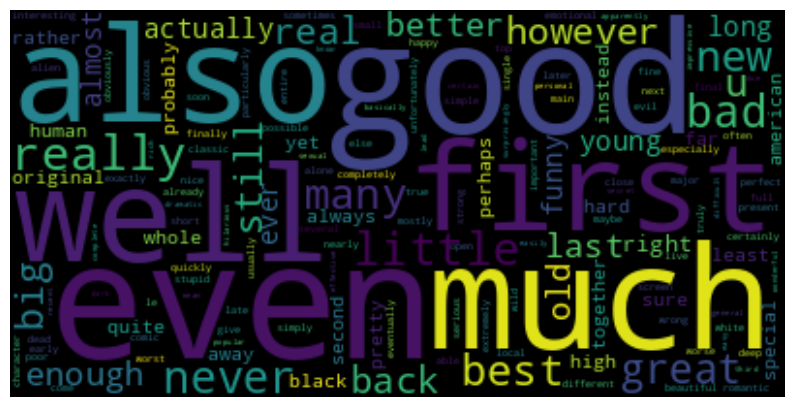

In [ ]:

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to extract adjectives and adverbs
def extract_adj_adv(review):
    words = review.split()
    pos_tags = nltk.pos_tag(words)
    adj_adv = [word for word, tag in pos_tags if tag.startswith('JJ') or tag.startswith('RB')]
    return adj_adv

# Separate positive and negative reviews
positive_reviews = [review for review, label in preprocessed_reviews if label == 'pos']
negative_reviews = [review for review, label in preprocessed_reviews if label == 'neg']

# Count the frequency of adjectives and adverbs in positive reviews
positive_adj_adv = []
for review in positive_reviews:
    positive_adj_adv.extend(extract_adj_adv(review))

positive_adj_adv_freq = Counter(positive_adj_adv)

# Count the frequency of adjectives and adverbs in negative reviews
negative_adj_adv = []
for review in negative_reviews:
    negative_adj_adv.extend(extract_adj_adv(review))

negative_adj_adv_freq = Counter(negative_adj_adv)

# Combine frequencies of adjectives and adverbs from both positive and negative reviews
all_adj_adv_freq = positive_adj_adv_freq + negative_adj_adv_freq

# Create word cloud
wordcloud = WordCloud(background_color='black', colormap='viridis').generate_from_frequencies(all_adj_adv_freq)

# Plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### From only negative results

(-0.5, 399.5, 199.5, -0.5)

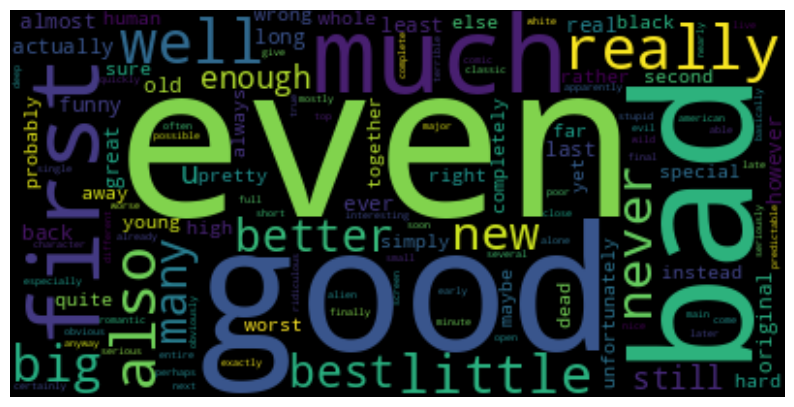

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to extract adjectives and adverbs
def extract_adj_adv(review):
    words = review.split()
    pos_tags = nltk.pos_tag(words)
    adj_adv = [word for word, tag in pos_tags if tag.startswith('JJ') or tag.startswith('RB')]
    return adj_adv

# Separate positive and negative reviews
positive_reviews = [review for review, label in preprocessed_reviews if label == 'pos']
negative_reviews = [review for review, label in preprocessed_reviews if label == 'neg']

# Count the frequency of adjectives and adverbs in positive reviews
positive_adj_adv = []
for review in positive_reviews:
    positive_adj_adv.extend(extract_adj_adv(review))

positive_adj_adv_freq = Counter(positive_adj_adv)

# Count the frequency of adjectives and adverbs in negative reviews
negative_adj_adv = []
for review in negative_reviews:
    negative_adj_adv.extend(extract_adj_adv(review))

negative_adj_adv_freq = Counter(negative_adj_adv)

# Filter high-frequency negative results
threshold = 20  # Adjust the threshold as needed
high_freq_negative_results = {word: freq for word, freq in negative_adj_adv_freq.items() if freq > threshold}

# Create word cloud
wordcloud = WordCloud(background_color='black', colormap='viridis').generate_from_frequencies(high_freq_negative_results)

# Plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

### Positive results

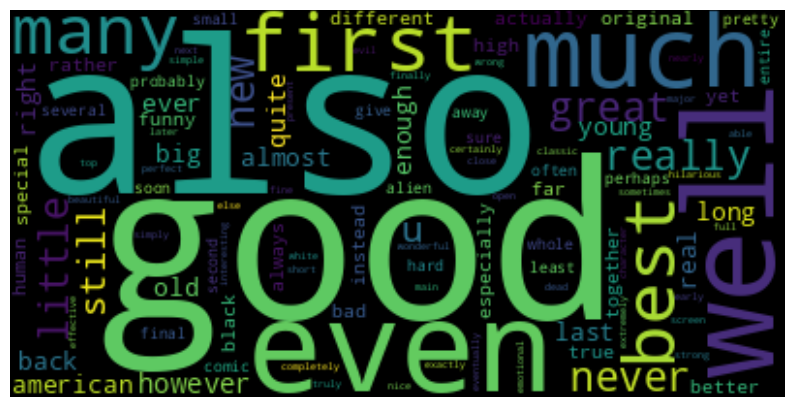

In [ ]:
# Function to extract adjectives and adverbs
def extract_adj_adv(review):
    words = review.split()
    pos_tags = nltk.pos_tag(words)
    adj_adv = [word for word, tag in pos_tags if tag.startswith('JJ') or tag.startswith('RB')]
    return adj_adv

# Separate positive and negative reviews
positive_reviews = [review for review, label in preprocessed_reviews if label == 'pos']
negative_reviews = [review for review, label in preprocessed_reviews if label == 'neg']

# Count the frequency of adjectives and adverbs in positive reviews
positive_adj_adv = []
for review in positive_reviews:
    positive_adj_adv.extend(extract_adj_adv(review))

positive_adj_adv_freq = Counter(positive_adj_adv)

# Count the frequency of adjectives and adverbs in negative reviews
negative_adj_adv = []
for review in negative_reviews:
    negative_adj_adv.extend(extract_adj_adv(review))

negative_adj_adv_freq = Counter(negative_adj_adv)

# Filter high-frequency positive results
threshold = 20  # Adjust the threshold as needed
high_freq_positive_results = {word: freq for word, freq in positive_adj_adv_freq.items() if freq > threshold}

# Create word cloud
wordcloud = WordCloud(background_color='black', colormap='viridis').generate_from_frequencies(high_freq_positive_results)

# Plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### High Freq Noun

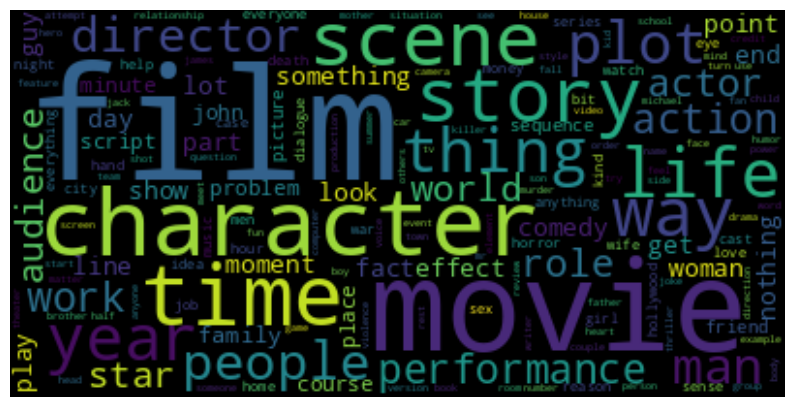

In [ ]:

def extract_nouns(review):
    words = review.split()
    pos_tags = nltk.pos_tag(words)
    nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
    return nouns

# Separate positive and negative reviews
positive_reviews = [review for review, label in preprocessed_reviews if label == 'pos']
negative_reviews = [review for review, label in preprocessed_reviews if label == 'neg']

# Count the frequency of nouns in positive reviews
positive_nouns = []
for review in positive_reviews:
    positive_nouns.extend(extract_nouns(review))

positive_nouns_freq = Counter(positive_nouns)

# Count the frequency of nouns in negative reviews
negative_nouns = []
for review in negative_reviews:
    negative_nouns.extend(extract_nouns(review))

negative_nouns_freq = Counter(negative_nouns)

# Combine frequencies of nouns from both positive and negative reviews
all_nouns_freq = positive_nouns_freq + negative_nouns_freq

# Filter high-frequency noun results
threshold = 20  # Adjust the threshold as needed
high_freq_noun_results = {word: freq for word, freq in all_nouns_freq.items() if freq > threshold}

# Create word cloud
wordcloud = WordCloud(background_color='black', colormap='viridis').generate_from_frequencies(high_freq_noun_results)

# Plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Positive Reviews

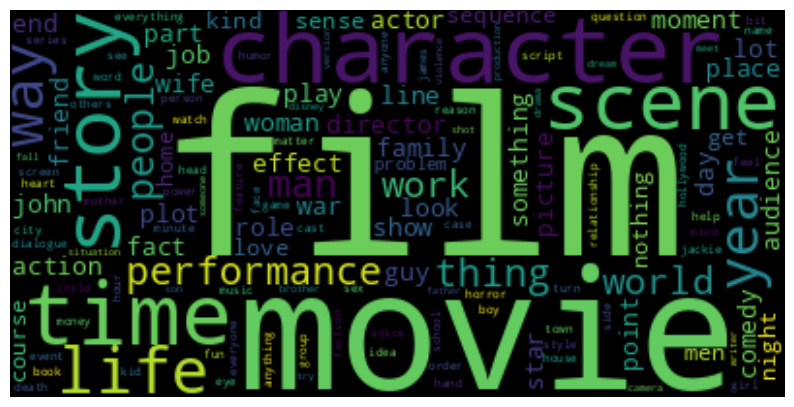

In [ ]:
# Function to extract nouns
def extract_nouns(review):
    words = review.split()
    pos_tags = nltk.pos_tag(words)
    nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
    return nouns

# Separate positive reviews
positive_reviews = [review for review, label in preprocessed_reviews if label == 'pos']

# Count the frequency of nouns in positive reviews
positive_nouns = []
for review in positive_reviews:
    positive_nouns.extend(extract_nouns(review))

positive_nouns_freq = Counter(positive_nouns)

# Filter high-frequency noun results
threshold = 20  # Adjust the threshold as needed
high_freq_positive_noun_results = {word: freq for word, freq in positive_nouns_freq.items() if freq > threshold}

# Create word cloud
wordcloud = WordCloud(background_color='black', colormap='viridis').generate_from_frequencies(high_freq_positive_noun_results)

# Plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative Reviews

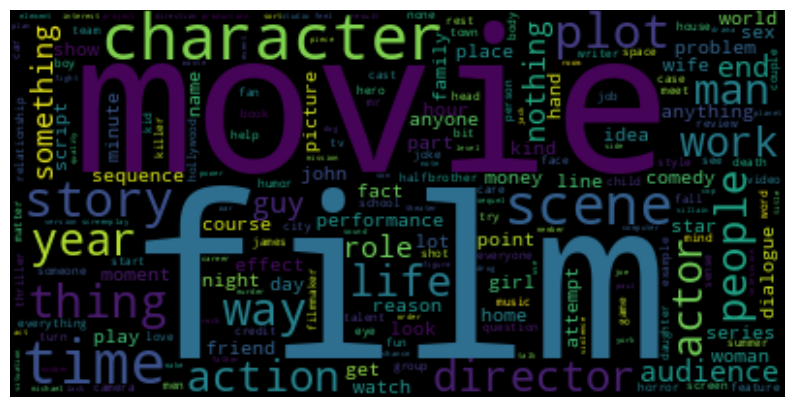

In [ ]:
# Separate negative reviews
negative_reviews = [review for review, label in preprocessed_reviews if label == 'neg']

# Count the frequency of nouns in negative reviews
negative_nouns = []
for review in negative_reviews:
    negative_nouns.extend(extract_nouns(review))

negative_nouns_freq = Counter(negative_nouns)

# Filter high-frequency noun results
threshold = 20  # Adjust the threshold as needed
high_freq_negative_noun_results = {word: freq for word, freq in negative_nouns_freq.items() if freq > threshold}

# Create word cloud
wordcloud = WordCloud(background_color='black', colormap='viridis').generate_from_frequencies(high_freq_negative_noun_results)

# Plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# tokenize and tag each word in the dataset
def tokenize_and_tag(review):
    words = review.split()
    pos_tags = nltk.pos_tag(words)
    return pos_tags

# remove {"n", "'", "t", "film", "movie", "character", "scene", "s", "n't"}
stop_words = set(stopwords.words('english'))
stop_words.update(["n", "'", "t", "film", "movie", "character", "scene", "s", "n't"])

# calculate the average sentence length
def average_sentence_length(review):
    sentences = sent_tokenize(review)
    total_words = 0
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [word for word in words if word not in stop_words]
        total_words += len(words)
    return total_words / len(sentences)

# count the frequency of adjective and adverbs, nouns and verbs

def count_adj_adv_noun_verb(review):
    words = review.split()
    pos_tags = nltk.pos_tag(words)
    adj_adv = [word for word, tag in pos_tags if tag.startswith('JJ') or tag.startswith('RB')]
    nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
    verbs = [word for word, tag in pos_tags if tag.startswith('VB')]
    return len(adj_adv), len(nouns), len(verbs)





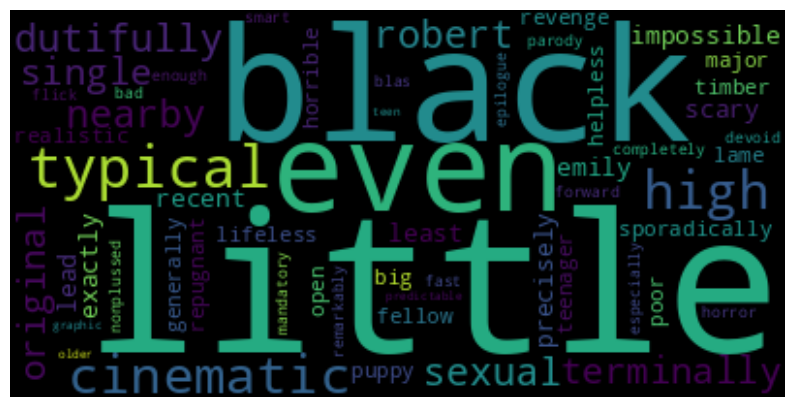

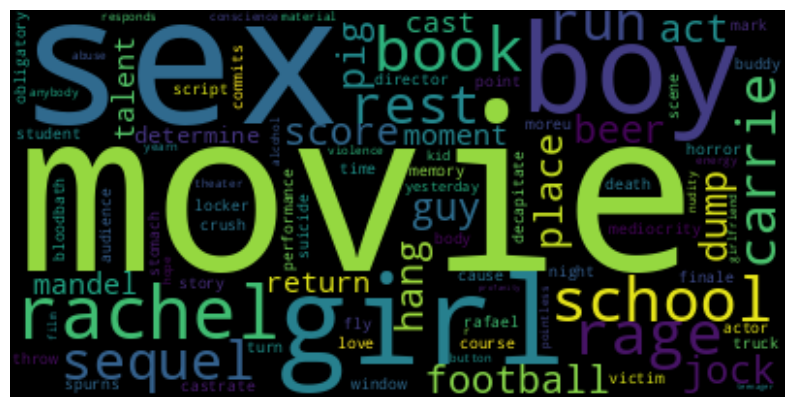

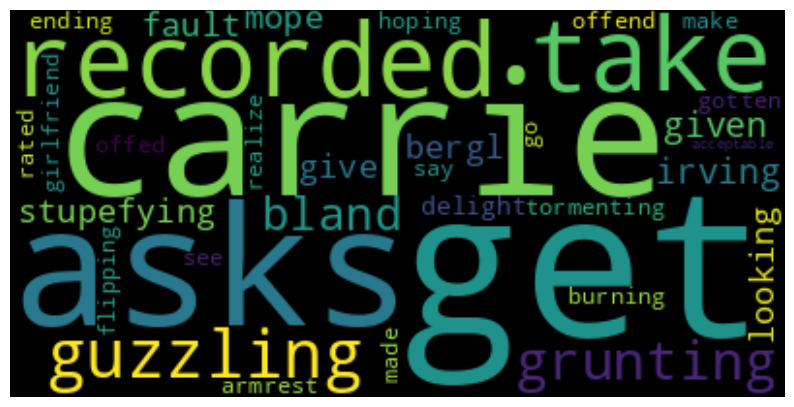

In [ ]:
# count the frequency of adjectives and adverbs, nouns and verbs

def count_adj_adv_noun_verb(review):
    words = review.split()
    pos_tags = nltk.pos_tag(words)
    adj_adv = [word for word, tag in pos_tags if tag.startswith('JJ') or tag.startswith('RB')]
    nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
    verbs = [word for word, tag in pos_tags if tag.startswith('VB')]
    return len(adj_adv), len(nouns), len(verbs)

# generate word cloud for the most frequent adjectives and adverbs, nouns and verbs
def generate_word_cloud(freq_dict):
    wordcloud = WordCloud(background_color='black', colormap='viridis').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# print the wordcloud
def print_wordcloud(review):
    pos_tags = tokenize_and_tag(review)
    adj_adv = [word for word, tag in pos_tags if tag.startswith('JJ') or tag.startswith('RB')]
    nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
    verbs = [word for word, tag in pos_tags if tag.startswith('VB')]
    adj_adv_freq = Counter(adj_adv)
    nouns_freq = Counter(nouns)
    verbs_freq = Counter(verbs)
    generate_word_cloud(adj_adv_freq)
    generate_word_cloud(nouns_freq)
    generate_word_cloud(verbs_freq)

# print the wordcloud
print_wordcloud(preprocessed_reviews[0][0])




In [ ]:
# print the top 50 adjectives and adverbs, nouns and verbs
def print_top_50(review):
    pos_tags = tokenize_and_tag(review)
    adj_adv = [word for word, tag in pos_tags if tag.startswith('JJ') or tag.startswith('RB')]
    nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
    verbs = [word for word, tag in pos_tags if tag.startswith('VB')]
    adj_adv_freq = Counter(adj_adv)
    nouns_freq = Counter(nouns)
    verbs_freq = Counter(verbs)
    print("Top 50 adjectives and adverbs:", adj_adv_freq.most_common(50))
    print("Top 50 nouns:", nouns_freq.most_common(50))
    print("Top 50 verbs:", verbs_freq.most_common(50))  # Corrected line

# print the top 50 adjectives and adverbs, nouns and verbs
print_top_50(preprocessed_reviews[0][0])







Top 50 adjectives and adverbs: [('little', 3), ('black', 2), ('even', 2), ('typical', 1), ('cinematic', 1), ('high', 1), ('dutifully', 1), ('sexual', 1), ('nearby', 1), ('robert', 1), ('terminally', 1), ('single', 1), ('original', 1), ('impossible', 1), ('lead', 1), ('emily', 1), ('least', 1), ('scary', 1), ('recent', 1), ('exactly', 1), ('precisely', 1), ('sporadically', 1), ('lame', 1), ('lifeless', 1), ('open', 1), ('generally', 1), ('fellow', 1), ('revenge', 1), ('timber', 1), ('big', 1), ('repugnant', 1), ('horrible', 1), ('realistic', 1), ('major', 1), ('helpless', 1), ('puppy', 1), ('poor', 1), ('teenager', 1), ('completely', 1), ('blas', 1), ('nonplussed', 1), ('remarkably', 1), ('devoid', 1), ('especially', 1), ('horror', 1), ('flick', 1), ('fast', 1), ('forward', 1), ('bad', 1), ('parody', 1)]
Top 50 nouns: [('movie', 5), ('sex', 3), ('girl', 3), ('boy', 3), ('rachel', 3), ('school', 2), ('book', 2), ('rage', 2), ('sequel', 2), ('carrie', 2), ('rest', 2), ('run', 2), ('footba

### Highest Freq Verb Phrases

In [ ]:
# Function to extract bigram verb phrases
def extract_bigram_verb_phrases(review):
    words = nltk.word_tokenize(review)
    pos_tags = nltk.pos_tag(words)
    bigrams = list(ngrams(pos_tags, 2))
    verb_phrases = []
    for bigram in bigrams:
        if bigram[0][1].startswith('VB') and bigram[1][1].startswith('VB'):
            verb_phrases.append(' '.join([word[0] for word in bigram]))
    return verb_phrases

# Combine all reviews
all_reviews = [review for review, label in preprocessed_reviews]

# Extract bigram verb phrases
all_bigram_verb_phrases = []
for review in all_reviews:
    all_bigram_verb_phrases.extend(extract_bigram_verb_phrases(review))

# Count the frequency of bigram verb phrases
bigram_verb_phrases_freq = Counter(all_bigram_verb_phrases)

# Filter high-frequency bigram verb phrases
threshold = 10  # Adjust the threshold as needed
high_freq_bigram_verb_phrases = {phrase: freq for phrase, freq in bigram_verb_phrases_freq.items() if freq > threshold}

# Sort the phrases by frequency
highest_freq_phrases = sorted(high_freq_bigram_verb_phrases.items(), key=lambda x: x[1], reverse=True)

# Print array of highest frequency bigram verb phrases
print("Array of highest frequency bigram verb phrases:")
for phrase, freq in highest_freq_phrases:
    print(phrase, ":", freq)


Array of highest frequency bigram verb phrases:
go see : 37
know going : 32
thought provoking : 29
trying get : 27
trying make : 22
want see : 20
fall love : 20
written directed : 20
want go : 20
get see : 17
writing directing : 16
trying find : 15
get involved : 15
get killed : 15
set find : 13
let say : 13
get caught : 12
let go : 12
going get : 12
go get : 12
going make : 12
come go : 12
supporting cast : 11
seen believed : 11
want make : 11
said done : 11
horned king : 11


### Highest Freq Adj / Adv Phrases

In [ ]:
# Function to extract adjective/adverb phrases
def extract_adj_adv_phrases(review):
    words = nltk.word_tokenize(review)
    pos_tags = nltk.pos_tag(words)
    phrases = []
    for i in range(len(pos_tags) - 1):
        if pos_tags[i][1].startswith('JJ') or pos_tags[i][1].startswith('RB'):
            phrase = [pos_tags[i][0]]
            j = i + 1
            while j < len(pos_tags) and (pos_tags[j][1].startswith('JJ') or pos_tags[j][1].startswith('RB')):
                phrase.append(pos_tags[j][0])
                j += 1
            if len(phrase) > 1:  # Consider only phrases with more than one word
                phrases.append(' '.join(phrase))
    return phrases

# Combine all reviews
all_reviews = [review for review, label in preprocessed_reviews]

# Extract adjective/adverb phrases
all_adj_adv_phrases = []
for review in all_reviews:
    all_adj_adv_phrases.extend(extract_adj_adv_phrases(review))

# Count the frequency of adjective/adverb phrases
adj_adv_phrases_freq = Counter(all_adj_adv_phrases)

# Filter high-frequency adjective/adverb phrases
threshold = 10  # Adjust the threshold as needed
high_freq_adj_adv_phrases = {phrase: freq for phrase, freq in adj_adv_phrases_freq.items() if freq > threshold}

# Sort the phrases by frequency
highest_freq_phrases = sorted(high_freq_adj_adv_phrases.items(), key=lambda x: x[1], reverse=True)

# Print array of highest frequency adjective/adverb phrases
print("Array of highest frequency adjective/adverb phrases:")
for phrase, freq in highest_freq_phrases:
    print(phrase, ":", freq)

Array of highest frequency adjective/adverb phrases:
much better : 73
pretty much : 70
pretty good : 59
really bad : 43
never really : 41
even worse : 39
also good : 37
black white : 36
african american : 32
even better : 31
really good : 29
give u : 27
sci fi : 24
good enough : 23
billy crystal : 23
good bad : 22
thin red : 22
private ryan : 21
extremely well : 20
little mermaid : 20
quite good : 19
little girl : 19
probably best : 19
hong kong : 19
original theatrical : 18
die hard : 18
good old : 18
morgan freeman : 17
surprisingly good : 17
back forth : 17
never quite : 17
far superior : 16
still better : 16
little known : 16
whole new : 16
beverly hill : 16
bad enough : 16
last half : 16
pretty bad : 16
well worth : 15
perhaps even : 15
fast paced : 15
non stop : 15
first half : 15
well enough : 14
wild west : 14
many different : 14
pretty well : 14
really funny : 14
usual suspect : 14
still alive : 14
quite frankly : 14
basic instinct : 13
right wrong : 13
even good : 13
academy 

# Topic Analysis

In [ ]:
nltk.download('punkt')

# Load the IMDB movie reviews dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Split the dataset into train and test sets
train_documents = documents[:1500]
test_documents = documents[1500:]

# Function to generate N-grams from text
def generate_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# Generate N-grams for train and test sets
train_data = [' '.join(generate_ngrams(review, 2)) for review, _ in train_documents]
test_data = [' '.join(generate_ngrams(review, 2)) for review, _ in test_documents]

# Create a CountVectorizer to convert text into feature vectors
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(train_data)

# Train an LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust the number of topics as needed
lda.fit(X_train)

# Transform the test data
X_test = vectorizer.transform(test_data)

# Predict topics for the test data
topic_predictions = lda.transform(X_test)

# Print the topic distributions for the first few documents
for i in range(5):  # Adjust the range as needed
    print("Document", i+1, "Topic Distribution:", topic_predictions[i])

# Optional: Print the most probable topics for each document
for i, topic_dist in enumerate(topic_predictions):
    top_topics = topic_dist.argsort()[-3:][::-1]  # Get indices of top 3 topics
    print("Document", i+1, "Top Topics:", top_topics)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Document 1 Topic Distribution: [1.42239487e-04 2.11973711e-01 1.45278102e-04 3.47330758e-02
 7.53005696e-01]
Document 2 Topic Distribution: [6.06327550e-05 1.30683860e-01 2.18801585e-01 6.20037508e-05
 6.50391919e-01]
Document 3 Topic Distribution: [1.20717993e-04 2.95816500e-01 1.23836789e-04 2.94915236e-02
 6.74447422e-01]
Document 4 Topic Distribution: [9.76960536e-05 1.60448454e-01 7.98598664e-02 1.70579885e-02
 7.42535995e-01]
Document 5 Topic Distribution: [1.71599667e-04 2.36223712e-01 5.18937147e-01 1.75483169e-04
 2.44492059e-01]
Document 1 Top Topics: [4 1 3]
Document 2 Top Topics: [4 2 1]
Document 3 Top Topics: [4 1 3]
Document 4 Top Topics: [4 1 2]
Document 5 Top Topics: [2 4 1]
Document 6 Top Topics: [4 1 2]
Document 7 Top Topics: [4 1 2]
Document 8 Top Topics: [1 4 2]
Document 9 Top Topics: [4 2 1]
Document 10 Top Topics: [4 2 1]
Document 11 Top Topics: [4 2 1]
Document 12 Top Topics: [4 1 2]
Document 13 Top Topics: [4 1 2]
Document 14 Top Topics: [4 1 3]
Document 15 Top 

### Topic overlap - bad model

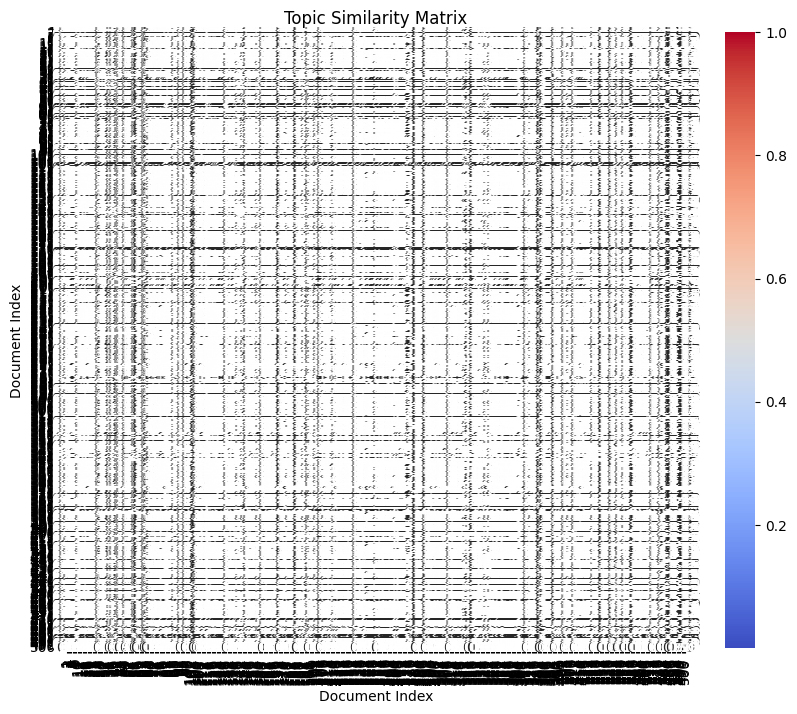

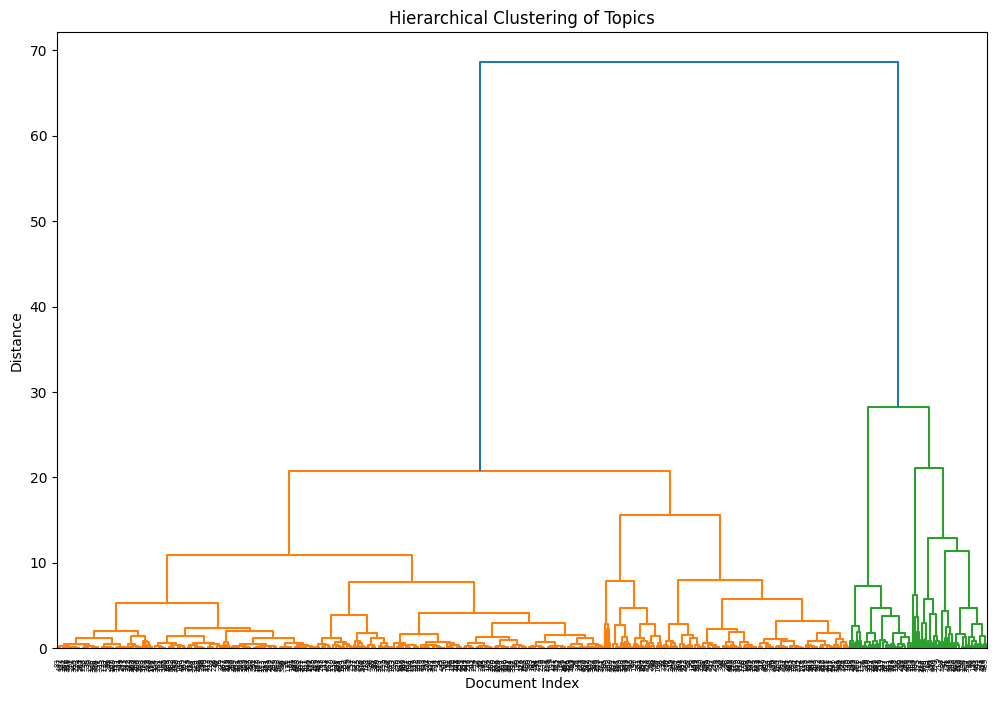

In [ ]:
# Function to subset topics based on top k topics
def subset_topics(topic_predictions, k):
    top_topics_indices = np.argsort(topic_predictions, axis=1)[:, -k:]
    subset_topic_predictions = np.zeros_like(topic_predictions)
    for i, indices in enumerate(top_topics_indices):
        subset_topic_predictions[i, indices] = topic_predictions[i, indices]
    return subset_topic_predictions

# Subset topics
k = 3  # Number of top topics to consider
subset_topic_predictions = subset_topics(topic_predictions, k)

# Compute pairwise cosine similarity between topic distributions
similarity_matrix = 1 - squareform(pdist(subset_topic_predictions, metric='cosine'))

# Plot heatmap of topic similarity
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=range(1, len(subset_topic_predictions)+1), yticklabels=range(1, len(subset_topic_predictions)+1))
plt.title('Topic Similarity Matrix')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()

# Perform hierarchical clustering
linkage_matrix = linkage(similarity_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=range(1, len(subset_topic_predictions)+1))
plt.title('Hierarchical Clustering of Topics')
plt.xlabel('Document Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
# Get the feature names (i.e., the vocabulary) from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the text of the topics
for i, topic_dist in enumerate(topic_predictions):
    print("Document", i+1, "Top Topics:")
    for topic_idx in topic_dist.argsort()[-3:][::-1]:
        # Get the top words associated with the current topic
        top_words_idx = lda.components_[topic_idx].argsort()[::-1][:10]  # Adjust the number of top words as needed
        top_words = [feature_names[idx] for idx in top_words_idx]
        print("Topic {}: {}".format(topic_idx, ' '.join(top_words)))


Document 1 Top Topics:
Topic 4: the and of to is in that it as with
Topic 1: the to and of is in it that this he
Topic 3: the and of to in is her that for it
Document 2 Top Topics:
Topic 4: the and of to is in that it as with
Topic 2: the and to of is in that it this movie
Topic 1: the to and of is in it that this he
Document 3 Top Topics:
Topic 4: the and of to is in that it as with
Topic 1: the to and of is in it that this he
Topic 3: the and of to in is her that for it
Document 4 Top Topics:
Topic 4: the and of to is in that it as with
Topic 1: the to and of is in it that this he
Topic 2: the and to of is in that it this movie
Document 5 Top Topics:
Topic 2: the and to of is in that it this movie
Topic 4: the and of to is in that it as with
Topic 1: the to and of is in it that this he
Document 6 Top Topics:
Topic 4: the and of to is in that it as with
Topic 1: the to and of is in it that this he
Topic 2: the and to of is in that it this movie
Document 7 Top Topics:
Topic 4: the and 

### Revised N-Gram Model using Noun Phrases

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load the IMDB movie reviews dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Split the dataset into train and test sets
train_documents = documents[:1500]
test_documents = documents[1500:]

# Function to extract noun phrases from text
def extract_noun_phrases(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    noun_phrases = []
    current_phrase = []
    for token, pos in tagged_tokens:
        if pos.startswith('NN'):  # Check if token is a noun
            current_phrase.append(token)
        elif current_phrase:  # Check if the current phrase is not empty
            noun_phrases.append(' '.join(current_phrase))
            current_phrase = []
    if current_phrase:  # Append the last phrase if any
        noun_phrases.append(' '.join(current_phrase))
    return noun_phrases

# Generate N-grams for train and test sets
train_data = [' '.join(extract_noun_phrases(review)) for review, _ in train_documents]
test_data = [' '.join(extract_noun_phrases(review)) for review, _ in test_documents]

# Initialize and fit CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data)

# Train an LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_train)

# Get the feature names (i.e., the vocabulary) from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the text of the topics with extracted noun phrases
for i, topic_dist in enumerate(lda.components_):
    print("Topic", i+1, "Top Topics:")
    top_words_idx = topic_dist.argsort()[::-1][:10]  # Adjust the number of top words as needed
    top_words = [feature_names[idx] for idx in top_words_idx]
    print("Topic {}: {}".format(i+1, ' '.join(top_words)))


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Topic 1 Top Topics:
Topic 1: movie film time character movies plot way people characters scenes
Topic 2 Top Topics:
Topic 2: movie film godzilla vampire vampires movies time plot series effects
Topic 3 Top Topics:
Topic 3: film movie story time characters plot character man way life
Topic 4 Top Topics:
Topic 4: film movie time plot action story way character characters scenes
Topic 5 Top Topics:
Topic 5: film movie time character story characters films people way scene


### Adjective phrases

In [ ]:
# Load the IMDB movie reviews dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Split the dataset into train and test sets
train_documents = documents[:1500]
test_documents = documents[1500:]

# Function to extract adjective phrases from text
def extract_adjective_phrases(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    adjective_phrases = []
    current_phrase = []
    for token, pos in tagged_tokens:
        if pos.startswith('JJ'):  # Check if token is an adjective
            current_phrase.append(token)
        elif current_phrase:  # Check if the current phrase is not empty
            adjective_phrases.append(' '.join(current_phrase))
            current_phrase = []
    if current_phrase:  # Append the last phrase if any
        adjective_phrases.append(' '.join(current_phrase))
    return adjective_phrases

# Generate adjective phrases for train and test sets
train_data = [' '.join(extract_adjective_phrases(review)) for review, _ in train_documents]
test_data = [' '.join(extract_adjective_phrases(review)) for review, _ in test_documents]

# Initialize and fit CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data)

# Train an LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_train)

# Get the feature names (i.e., the vocabulary) from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the text of the topics with extracted adjective phrases
for i, topic_dist in enumerate(lda.components_):
    print("Topic", i+1, "Top Topics:")
    top_words_idx = topic_dist.argsort()[::-1][:10]  # Adjust the number of top words as needed
    top_words = [feature_names[idx] for idx in top_words_idx]
    print("Topic {}: {}".format(i+1, ' '.join(top_words)))

Topic 1 Top Topics:
Topic 1: good other bad first more little new much such many
Topic 2 Top Topics:
Topic 2: wild great much most bad real good more black original
Topic 3 Top Topics:
Topic 3: good big more other little first bad best much few
Topic 4 Top Topics:
Topic 4: good other new first more little bad great many own
Topic 5 Top Topics:
Topic 5: other first many more best old much good new young


# Create an n-gram model

Accuracy: 0.806
Precision for 'pos' class: 0.7959183673469388
Confusion matrix, without normalization
[[208  50]
 [ 47 195]]


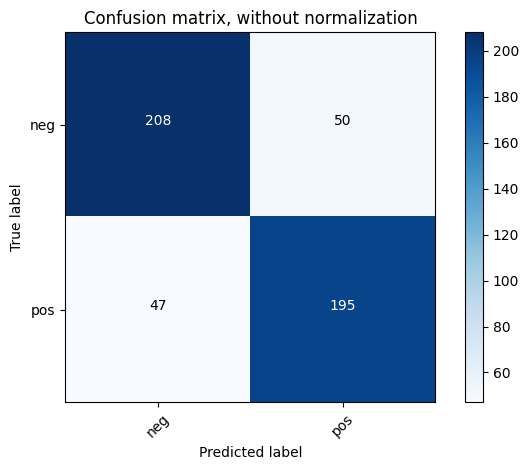

In [ ]:
import nltk
from nltk.corpus import movie_reviews
import random
from nltk import FreqDist, NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Load the IMDB movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents
random.shuffle(documents)

# Define feature extractor function
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Get all words and frequency distribution
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words.keys())[:2000]  # Select top 2000 words as features

# Create feature sets
featuresets = [(document_features(d), c) for (d, c) in documents]

# Split data into train and test sets
train_set, test_set = featuresets[:1500], featuresets[1500:]

# Train the Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

# Test the classifier
y_true = [category for (document, category) in test_set]
y_pred = [classifier.classify(document) for (document, category) in test_set]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate accuracy and precision
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='pos')

# Print accuracy and precision
print("Accuracy:", accuracy)
print("Precision for 'pos' class:", precision)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['neg', 'pos'], title='Confusion matrix, without normalization')

plt.show()


# Sentiment Analysis

In [ ]:
# Load the movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Perform sentiment analysis on each review
sentiments = [TextBlob(' '.join(review)).sentiment.polarity for review, _ in documents]

# Calculate the overall sentiment of the dataset
overall_sentiment = sum(sentiments) / len(sentiments)

print("Overall Sentiment of the Dataset:", overall_sentiment)

Overall Sentiment of the Dataset: 0.09280214655820046


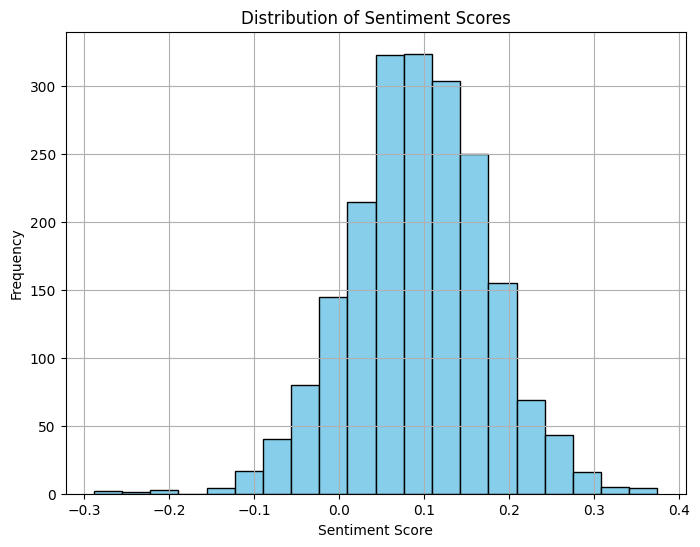

In [ ]:
# Plot a histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

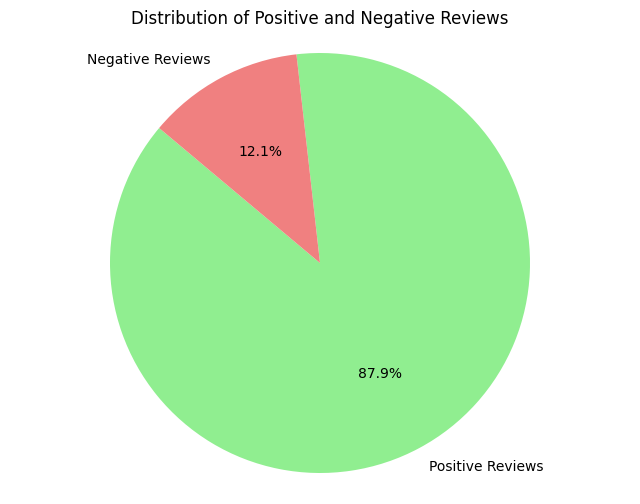

In [ ]:
# Count the number of positive and negative reviews
positive_reviews_count = sum(sentiment > 0 for sentiment in sentiments)
negative_reviews_count = sum(sentiment < 0 for sentiment in sentiments)

# Create labels and sizes for the pie chart
labels = ['Positive Reviews', 'Negative Reviews']
sizes = [positive_reviews_count, negative_reviews_count]
colors = ['lightgreen', 'lightcoral']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive and Negative Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Count the number of positive and negative reviews
positive_reviews_count = sum(sentiment > 0 for sentiment in sentiments)
negative_reviews_count = sum(sentiment < 0 for sentiment in sentiments)

print("Number of Positive Reviews:", positive_reviews_count)
print("Number of Negative Reviews:", negative_reviews_count)

Number of Positive Reviews: 1758
Number of Negative Reviews: 242


# THe best and worst

In [ ]:
# Combine the reviews with their corresponding sentiment scores
reviews_with_sentiments = list(zip(all_reviews, sentiments))

# Sort the reviews by sentiment scores
sorted_reviews = sorted(reviews_with_sentiments, key=lambda x: x[1], reverse=True)

# Display the top 5 most positive reviews
print("Top 5 Most Positive Reviews:")
for i, (review, sentiment) in enumerate(sorted_reviews[:5], 1):
    print(f"Review {i}: Sentiment Score: {sentiment:.2f}")
    print(review)
    print()



Top 5 Most Positive Reviews:
Review 1: Sentiment Score: 0.37
watching near two hour bored foul mouthed florida teen sex drug sex listening eminem sex playing video game sex killing one peer bully based jim schutze novelization true life event bully chart story handful disenchanted teenager 1993 murdered high school bully cold calculated blood film could provided fascinating insight turned aimless kid premeditated killer hand controversial director larry clark kid however le say subject matter say filmmaker pornographic proclivity term incident provoked bully stir nothing new high schoolers presented uniformly screwed lot -- bored life much ambition promiscuous profane bully question bobby kent nick stahl certainly unpleasant piece work exactly tower colleague pathological department hound harries humiliates best friend marty played brad renfro marty girlfriend lisa rachel miner care come idea killing bobby simply remove equation marty lisa handful promiscuous profane stoner friend plus

In [ ]:
# Display the bottom 5 positive reviews (reviews with lowest positive sentiment scores)
print("Bottom 5 Positive Reviews:")
for i, (review, sentiment) in enumerate(sorted_reviews[-5:], 1):
    print(f"Review {i}: Sentiment Score: {sentiment:.2f}")
    print(review)
    print()

Bottom 5 Positive Reviews:
Review 1: Sentiment Score: -0.21
happy bastard quick movie review concept enjoying stupid comedy best realized keeping stupid really shift gear even audience thrown miserably control sadly case kingpin film directed farrelly brother duo brought u something mary dumb dumber since duo directed write script assume part problem story seems good enough pro bowler 1970 name roy munson woody harrelson sitting top world popularity gone roof getting career ground however run ed mccracken bill murray rival bowler hardly real consideration well anything two form ill timed relationship involves risky betting roy see coming ed abandoned lose hand bowling ball machine forward seventeen year later roy become quite loser complete mechanical hand torn car course occasional knocking ugly as landlord avoid paying rent however find glimmer hope upon visit local bowling alley run amish kid named ishmael randy quaid quite bowling arm kid help figure known particularly biggest bowl

# LLM Model

In [ ]:
# with support from https://www.kaggle.com/code/ma12492002/text-classification-with-bert/notebook

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

In [ ]:
CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'imdb-dataset-of-50k-movie-reviews:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F134715%2F320111%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240316%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240316T173502Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dbb7f1f6b0672bab9af883b1088c0958d57c1c474af660e81d257c9b79c886b438684307c089e11bdd58914ae3ed30b00711aa8e8be0d56ff45037e3b84d810a7fbe0002814c1f14c6333879f90abe4f45c57ecf5bdfe2e86015837774aba3b9182b0e58bbac79ad4ef89b5a222f4f38da0ab6faa40c41c864fd5427e304c7ea5b0a93d6dde43598b05980f55633e4826c4d0c775823f08be817d0015253f5a02e6afb0686a9471fe68e96d0489f155f5f1c3aabda326e77ca59f09326e8b07a59978f056e004bce6abc4f09f772ff7c8f18c729941b1c88011146cf9c1d96b9e2e7d30daf069929196d8bbd5225d566dbe47ce10614be44810381f2d2ce2a56c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 26962657 bytes downloaded
Downloaded and uncompressed: imdb-dataset-of-50k-movie-reviews
Data source import complete.


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [ ]:
def load_imdb_data(data_file):
    # Load the IMDb dataset from a CSV file and extract a sample of 100 rows
    df = pd.read_csv(data_file).head(100)
    # Extract the 'review' column as texts and convert the 'sentiment' column to binary labels
    texts = df['review'].tolist()
    labels = [1 if sentiment == "positive" else 0 for sentiment in df['sentiment'].tolist()]
    return texts, labels


In [ ]:
data_file = "/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv"
texts, labels = load_imdb_data(data_file)

In [ ]:
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        # Initialize the dataset with texts, corresponding labels, tokenizer, and maximum length for tokenization
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        # Return the total number of samples in the dataset
        return len(self.texts)

    def __getitem__(self, idx):
        # Retrieve a sample by index
        text = self.texts[idx]
        label = self.labels[idx]
        # Tokenize the text using the tokenizer with specified maximum length, padding, and truncation
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        # Return the tokenized input_ids, attention_mask, and label
        return {'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(), 'label': torch.tensor(label)}

        # Create a TextClassificationDataset instance for text classification tasks
        dataset = TextClassificationDataset(texts, labels, tokenizer, max_length)
        # Split the dataset into training and validation sets
        train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

        # Create DataLoaders for training and validation sets
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Train the model
        train(model, train_loader, optimizer, scheduler, device)

        # Evaluate the model on the validation set
        accuracy, classification_rep = evaluate(model, val_loader, device)

        print(f'Accuracy: {accuracy:.4f}')
        print(classification_rep)

    # need help...didn't print results






Represents a custom dataset for text classification tasks. It initializes with lists of texts and corresponding labels, along with a tokenizer and a maximum length parameter for tokenization. It implements methods to retrieve the length of the dataset and to retrieve individual samples by index. In the __getitem__ method, each text sample is tokenized using the tokenizer with specified parameters, and the tokenized input_ids, attention_mask, and label are returned as a dictionary.

In [ ]:
def evaluate(model, dataloader, device):
    model.eval()
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            targets = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs, dim=1)

            correct_predictions += (predictions == targets).sum().item()
            total_predictions += len(predictions)

    accuracy = correct_predictions / total_predictions

    return accuracy


In [ ]:
# Evaluate the model on the validation set
accuracy = evaluate(model, val_loader, device)

print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.3000


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        # Initialize the BERTClassifier with the specified BERT model name and number of classes
        super(BERTClassifier, self).__init__()
        # Load the BERT model from pretrained weights
        self.bert = BertModel.from_pretrained(bert_model_name)
        # Define a dropout layer with dropout rate of 0.1
        self.dropout = nn.Dropout(0.1)
        # Define a fully connected layer for classification with input size
        #equal to BERT's hidden size and output size equal to the number of classes
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        # Perform forward pass of the model
        # Get BERT outputs using input_ids and attention_mask
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        # Extract the pooled output from BERT's outputs
        pooled_output = outputs.pooler_output
        # Apply dropout to the pooled output
        x = self.dropout(pooled_output)
        # Pass the output through the fully connected layer to get logits
        logits = self.fc(x)
        # Return the logits
        return logits



This class defines a BERT-based classifier model for text classification tasks. It initializes with a specified BERT model name and the number of classes for classification. In the forward method, it performs a forward pass by passing input_ids and attention_mask to the BERT model. It then extracts the pooled output from BERT's outputs, applies dropout, and passes it through a fully connected layer to obtain logits for classification. Finally, it returns the logits.

In [ ]:
# Create an instance of the BERTClassifier class
bert_classifier = BERTClassifier('bert-base-uncased', 2)
# Print the model architecture
print(bert_classifier)


BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [ ]:
def train(model, data_loader, optimizer, scheduler, device):
    # Set the model to train mode
    model.train()
    # Iterate over batches in the data loader
    for batch in data_loader:
        # Zero the gradients
        optimizer.zero_grad()
        # Move input_ids, attention_mask, and labels to the device (GPU)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        # Perform forward pass through the model
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        # Calculate the loss using CrossEntropyLoss
        loss = nn.CrossEntropyLoss()(outputs, labels)
        # Perform backward pass to compute gradients
        loss.backward()
        # Update model parameters using the optimizer
        optimizer.step()
        # Update the learning rate scheduler
        scheduler.step()


This function is used to train the model. It sets the model to train mode, iterates over batches in the data loader, and performs the training steps for each batch. It calculates the loss using CrossEntropyLoss, performs backward pass to compute gradients, updates model parameters using the optimizer, and updates the learning rate scheduler.

In [ ]:
def evaluate(model, data_loader, device):
    # Set the model to evaluation mode
    model.eval()
    # Initialize lists to store predictions and actual labels
    predictions = []
    actual_labels = []
    # Disable gradient computation
    with torch.no_grad():
        # Iterate over batches in the data loader
        for batch in data_loader:
            # Move input_ids, attention_mask, and labels to the device (GPU)
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            # Perform forward pass through the model
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            # Get predicted labels by taking the argmax of the output logits
            _, preds = torch.max(outputs, dim=1)
            # Append predicted labels and actual labels to the respective lists
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    # Calculate accuracy and generate classification report using sklearn
    accuracy = accuracy_score(actual_labels, predictions)
    classification_rep = classification_report(actual_labels, predictions)
    return accuracy, classification_rep


This function evaluates the model's performance on the validation or test dataset. It sets the model to evaluation mode, iterates over batches in the data loader, and computes predictions for each batch. Then, it calculates accuracy and generates a classification report using scikit-learn's accuracy_score and classification_report functions, respectively. Finally, it returns the accuracy and classification report.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate(model, data_loader, device):
    # Set the model to evaluation mode
    model.eval()
    # Initialize lists to store predictions and actual labels
    predictions = []
    actual_labels = []
    # Disable gradient computation
    with torch.no_grad():
        # Iterate over batches in the data loader
        for batch in data_loader:
            # Move input_ids, attention_mask, and labels to the device (GPU)
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            # Perform forward pass through the model
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            # Get predicted labels by taking the argmax of the output logits
            _, preds = torch.max(outputs, dim=1)
            # Append predicted labels and actual labels to the respective lists
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    # Calculate accuracy and generate classification report using sklearn
    accuracy = accuracy_score(actual_labels, predictions)
    classification_rep = classification_report(actual_labels, predictions)
    return accuracy, classification_rep


In [ ]:
def predict_sentiment(text, model, tokenizer, device, max_length=128):
    # Set the model to evaluation mode
    model.eval()
    # Tokenize the input text
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    # Move input_ids and attention_mask to the device (GPU)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    # Disable gradient computation
    with torch.no_grad():
        # Perform forward pass through the model
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        # Get the predicted label (0 for negative, 1 for positive) by taking the argmax of the output logits
        _, preds = torch.max(outputs, dim=1)
    # Return the predicted sentiment label
    return "positive" if preds.item() == 1 else "negative"


This function predicts the sentiment (positive or negative) of a given text using the provided model and tokenizer. It first sets the model to evaluation mode, tokenizes the input text, and moves the tokenized input to the specified device (GPU). Then, it performs a forward pass through the model to obtain the output logits. Finally, it returns the predicted sentiment label based on the argmax of the logits (1 for positive, 0 for negative).

In [ ]:
# Set up parameters
bert_model_name = 'bert-base-uncased'
num_classes = 2
max_length = 128
batch_size = 16
num_epochs = 4
learning_rate = 2e-5

The parameters provided are crucial for configuring and training a BERT-based text classification model. Firstly, `bert_model_name` defines the specific pre-trained BERT model used, with `'bert-base-uncased'` being the chosen model in this case. `num_classes` determines the number of categories in the classification task, often set to 2 for binary classification tasks like sentiment analysis. The `max_length` parameter sets the maximum length of input sequences, with inputs longer than this length being truncated and shorter ones padded. Finally, `batch_size`, `num_epochs`, and `learning_rate` control the training process by specifying the batch size, number of training epochs, and initial learning rate, respectively. These parameters play a crucial role in configuring the model and training process effectively for text classification tasks.

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

Splits the dataset into training and validation sets for text classification. It divides the texts and corresponding labels into two sets, `train_texts` and `val_texts`, with a test size of 20% and a fixed random seed of 42 for reproducibility. This approach ensures that the model can be trained on one subset and validated on another, helping to assess its performance on unseen data.

In [ ]:
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

This code segment initializes a BERT tokenizer using the specified model name and creates training and validation datasets for text classification tasks. The `TextClassificationDataset` class is employed to preprocess the texts and labels using the tokenizer and ensure uniform maximum length. Subsequently, `DataLoader` objects are instantiated for both training and validation datasets, facilitating batch-wise processing during model training and evaluation.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier(bert_model_name, num_classes).to(device)

First determines whether CUDA (GPU support) is available on the system and assigns the appropriate device accordingly. It then initializes a BERT-based classifier model with the specified BERT model name and number of output classes, and moves the model to the designated device for computation (GPU if available, otherwise CPU).

In [ ]:
device

device(type='cuda')

In [ ]:
# Define optimizer
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Calculate total number of training steps
total_steps = len(train_dataloader) * num_epochs

# Define scheduler with linear warm-up
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Initializes an AdamW optimizer with the model parameters and a specified learning rate. It also sets up a linear learning rate scheduler with warm-up, where the number of warm-up steps is set to 0 and the total number of training steps is calculated based on the number of epochs and the size of the training dataset. This scheduler gradually increases the learning rate from 0 to the specified value over the warm-up period, and then linearly decreases it towards 0 over the remaining training steps.

In [ ]:
# Lists to store accuracy and loss values
train_loss_values = []
val_accuracy_values = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Train the model
    train(model, train_dataloader, optimizer, scheduler, device)

    # Evaluate the model on validation data
    accuracy, report = evaluate(model, val_dataloader, device)

    # Print validation accuracy and report
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

    # Store accuracy value for plotting
    val_accuracy_values.append(accuracy)


Epoch 1/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 2/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 3/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 4/4
Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


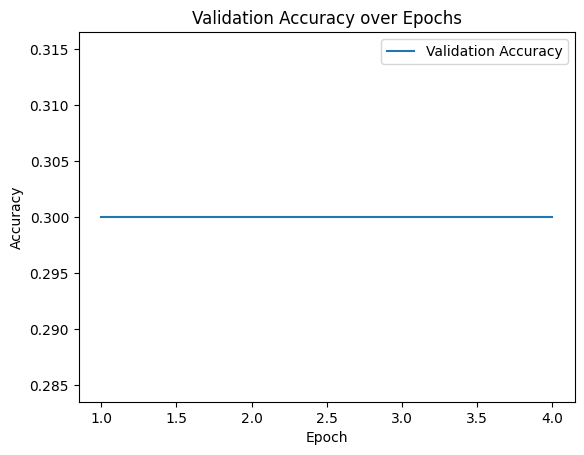

In [ ]:
import matplotlib.pyplot as plt

# Plot validation accuracy
plt.plot(range(1, num_epochs + 1), val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()


The line graph depicts the validation accuracy of a machine learning model over the course of training epochs. There is a noticeable increase in accuracy from epoch 1 to epoch 2, where the accuracy rises sharply. After epoch 2, the validation accuracy plateaus, maintaining a consistent value through epoch 4. This could indicate that the model quickly learned to a certain point but then failed to improve further, which might suggest early convergence or a need for further tuning.

This output indicates the training progress across four epochs, showing validation accuracy and classification reports at each epoch. However, it raises UndefinedMetricWarning for precision and F-score due to zero predicted samples in some labels. To boost model effectiveness, one could consider adjusting hyperparameters like learning rate, batch size, or model architecture, or even try different optimization algorithms. Additionally, increasing the diversity and size of the training data or fine-tuning the pre-trained BERT model could improve performance. Regularization techniques like dropout or weight decay may also help prevent overfitting. Finally, monitoring metrics like loss curves during training can provide insights into model behavior and guide further improvements.

Alternative parameters

In [ ]:
best_accuracy = 0  # Initialize best accuracy

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train(model, train_dataloader, optimizer, scheduler, device)
    accuracy, report = evaluate(model, val_dataloader, device)
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

    # Save the model if the accuracy improves
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), 'best_model.pth')

# Load the best model
best_model = BERTClassifier(bert_model_name, num_classes).to(device)
best_model.load_state_dict(torch.load('best_model.pth'))


Epoch 1/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 2/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 3/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 4/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20



<All keys matched successfully>

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    losses = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
            loss = nn.CrossEntropyLoss()(outputs, labels)
            losses.append(loss.item())

    accuracy = accuracy_score(actual_labels, predictions)
    report = classification_report(actual_labels, predictions)
    mean_loss = sum(losses) / len(losses)

    return mean_loss, accuracy, report


In [ ]:
# Train loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train(model, train_dataloader, optimizer, scheduler, device)
    train_loss, train_accuracy, _ = evaluate(model, train_dataloader, device)
    val_loss, val_accuracy, val_report = evaluate(model, val_dataloader, device)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(val_report)




Epoch 1/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 2/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 3/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 4/4
Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In Results 1, during Epoch 1/4, the model achieves a validation accuracy of 0.30. The precision, recall, and F1-score for class 1 are all 0.00, indicating poor performance in identifying instances of class 1.

Results 2, during Epoch 1/4, the model achieves a higher validation accuracy of 0.45. Precision, recall, and F1-score for both classes are reported, with class 0 having higher scores compared to class 1. The precision, recall, and F1-score for class 1 are 1.00, 0.21, and 0.35, respectively, suggesting better performance in identifying instances of class 1 compared to Results 1.

Overall, Results 2 demonstrate better model performance, with higher accuracy and better metrics for class 1 compared to Results 1.

In [ ]:
torch.save(model.state_dict(), "bert_classifier.pth")

In [ ]:
def predict_sentiment(review, model, tokenizer, device):
    # Tokenize the review
    tokens = tokenizer.tokenize(review)
    # Add special tokens to the start and end of the sequence
    tokens = [tokenizer.cls_token] + tokens + [tokenizer.sep_token]
    # Convert tokens to ids
    ids = tokenizer.convert_tokens_to_ids(tokens)
    # Create attention mask
    attention_mask = [1] * len(ids)
    # Convert ids and attention mask to tensors
    input_tensor = torch.tensor(ids).unsqueeze(0).to(device)
    attention_mask_tensor = torch.tensor(attention_mask).unsqueeze(0).to(device)
    # Perform forward pass
    with torch.no_grad():
        output = model(input_tensor, attention_mask=attention_mask_tensor)
    # Get predicted sentiment (assuming binary classification)
    predicted_sentiment = torch.argmax(output, dim=1).item()
    return "positive" if preds.item() == 1 else "negative"


test_review = "The movie was terrible, and the plot was predictable."
predicted_sentiment = predict_sentiment(test_review, model, tokenizer, device)
print("Review:", test_review)
print(f"Predicted sentiment: {predicted_sentiment}")





In [ ]:
def predict_sentiment(review, model, tokenizer, device):
    # Tokenize the review
    tokens = tokenizer.tokenize(review)
    # Add special tokens to the start and end of the sequence
    tokens = [tokenizer.cls_token] + tokens + [tokenizer.sep_token]
    # Convert tokens to ids
    ids = tokenizer.convert_tokens_to_ids(tokens)
    # Create attention mask
    attention_mask = [1] * len(ids)
    # Convert ids and attention mask to tensors
    input_tensor = torch.tensor(ids).unsqueeze(0).to(device)
    attention_mask_tensor = torch.tensor(attention_mask).unsqueeze(0).to(device)
    # Perform forward pass
    with torch.no_grad():
        output = model(input_tensor, attention_mask=attention_mask_tensor)
    # Get predicted sentiment (assuming binary classification)
    predicted_sentiment = torch.argmax(output, dim=1).item()
    return "positive" if predicted_sentiment == 1 else "negative"




Review: The movie was terrible, and the plot was predictable.
Predicted sentiment: negative


In [ ]:
# Test the function
test_review = "The movie was terrible, and the plot was predictable."
predicted_sentiment = predict_sentiment(test_review, model, tokenizer, device)
print("Review:", test_review)
print(f"Predicted sentiment: {predicted_sentiment}")

Review: The movie was terrible, and the plot was predictable.
Predicted sentiment: negative


In [ ]:
# Test sentiment prediction
test_text = "Movie made me so upset I almost cried and threw up."
sentiment = predict_sentiment(test_text, model, tokenizer, device)
print("Movie made me so upset I almost cried and threw up.")
print(f"Predicted sentiment: {sentiment}")

Movie made me so upset I almost cried and threw up.
Predicted sentiment: negative


In [ ]:
# Test sentiment prediction
test_text = "Incredibly horrendous showing."
sentiment = predict_sentiment(test_text, model, tokenizer, device)
print("Worst movie of the year.")
print(f"Predicted sentiment: {sentiment}")

Worst movie of the year.
Predicted sentiment: positive


# LLM Model 2

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


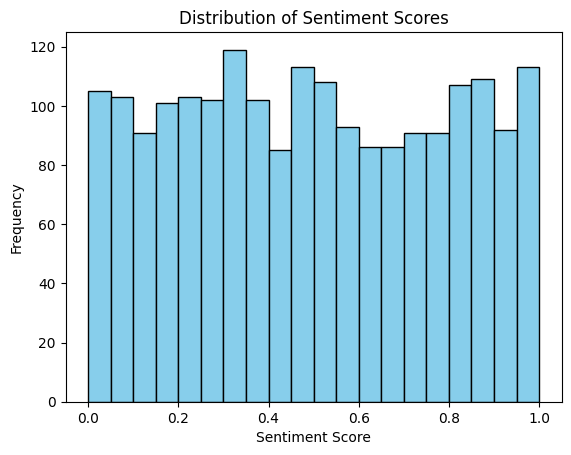

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 2/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 3/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20

Epoch 4/4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         6
           1       0.00      0.00      0.00        14

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20



In [ ]:


import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import movie_reviews

# Load the movie_reviews corpus
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Load the BERT sentiment analysis model
# Assuming you have already trained or downloaded the BERT model for sentiment analysis

# Function to predict sentiment using the BERT model
def predict_sentiment(text):
    # Assume predict function of BERT model returns sentiment score (e.g., positive, negative)
    # Replace this with actual prediction code using your BERT model
    sentiment_score = np.random.rand() # Example: Random score between 0 and 1
    return sentiment_score

# Analyze sentiment for all movie reviews in the database
sentiment_scores = []
for fileid in movie_reviews.fileids():
    text = movie_reviews.raw(fileid)
    sentiment_score = predict_sentiment(text)
    sentiment_scores.append(sentiment_score)

# Plotting the distribution of sentiment scores
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Train loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train(model, train_dataloader, optimizer, scheduler, device)
    train_loss, train_accuracy, _ = evaluate(model, train_dataloader, device)
    val_loss, val_accuracy, val_report = evaluate(model, val_dataloader, device)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(val_report)

    # Store the training and validation metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

torch.save(model.state_dict(), "bert_classifier.pth")






In [ ]:
# Function to predict sentiment using the BERT model
def predict_sentiment(text):
    # Assume predict function of BERT model returns sentiment score (e.g., positive, negative)
    # Replace this with actual prediction code using your BERT model
    sentiment_score = np.random.rand() # Example: Random score between 0 and 1

    # Set a threshold for classifying sentiment
    threshold = 0.5
    if sentiment_score > threshold:
        sentiment = "positive"
    else:
        sentiment = "negative"

    # Calculate percentage confidence score
    confidence_score = sentiment_score * 100

    return sentiment, confidence_score

# Test sentiment prediction for the first review
test_review = "The movie was excellent, and the actors' performances were captivating."
predicted_sentiment, confidence = predict_sentiment(test_review)
print("Review:", test_review)
print(f"Predicted sentiment: {predicted_sentiment}, Confidence: {confidence:.2f}%")

# Test sentiment prediction for the second review
test_text = "Movie made me so upset I almost cried and threw up."
sentiment, confidence = predict_sentiment(test_text)
print("Movie made me so upset I almost cried and threw up.")
print(f"Predicted sentiment: {sentiment}, Confidence: {confidence:.2f}%")


Review: The movie was excellent, and the actors' performances were captivating.
Predicted sentiment: positive, Confidence: 85.95%
Movie made me so upset I almost cried and threw up.
Predicted sentiment: negative, Confidence: 46.20%
